# Distributions

## The Basics
After having developed a formalized notion of probability, we can discuss *distributions* by easily extending the discussion of random variables from before. Let's start with the discrete case:

**Definition**: The _distribution_ of a discrete random variable $X$ is the set of all values the random variable can take on $x \in \mathcal{X}$, and their probabilities $P(X = x)$. Formally, $(x, P(X=x)) \forall x \in \mathcal{X}$.

This simply means that a discrete distribution is just all of the values of the random variable $X$ and their associated probabilities. If we flip a fair coin, and $X=1$ denotes heads, the distribution is simply $(0, 0.5), (1, 0.5)$.

In fact, the distribution of a continuous random variable is even easier to define! For a continuous random variable $X$, we already have a density function $f_X(x)$ that maps from values to probability density. Thus, the distribution of a continuous random variable is just given by the pdf $f_X(x)$. It's often to equivalently describe a continuous distribution by the *Cumulative Density Function (CDF)*, $F_X(x) = P(X \leq x)$. 

Distributions essentially define a new probability space, where each outcome is now a real value with an associated probabiity (or probability measure in continuous case).

Now let's look at some examples of distributions.

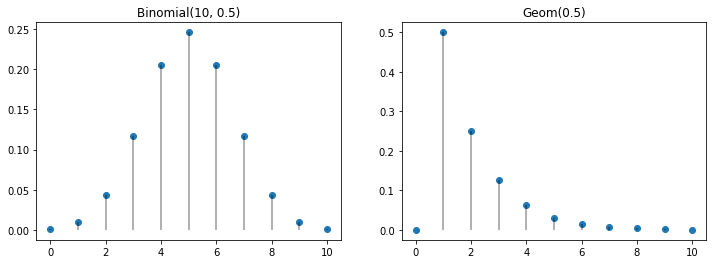

In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

x = np.arange(0, 11)
y = stats.binom.pmf(x, 10, 0.5)
ax[0].vlines(x=x, ymin=0, ymax=y, alpha=0.4)
ax[0].scatter(x, y)
ax[0].set_title("Binomial(10, 0.5)")

x = np.arange(0, 11)
y = stats.geom.pmf(x, 0.5)
ax[1].vlines(x=x, ymin=0, ymax=y, alpha=0.4)
ax[1].scatter(x, y)
_ = ax[1].set_title("Geom(0.5)")

Above are examples of discrete probability distributions. The left is the distribuiton of the binomial distribution with $n = 10$ and $p = 0.5$. The right is a plot of the discrete geometric distribution with probability $0.5$. It describes the number of flips of a coin with probability $0.5$ before seeing a heads.

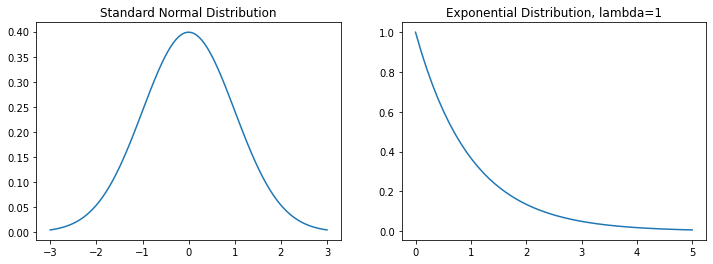

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax[0].plot(x, stats.norm.pdf(x, mu, sigma))
ax[0].set_title("Standard Normal Distribution")
print("")


sigma = math.sqrt(variance)
x = np.linspace(0, 5)
ax[1].plot(x, stats.expon.pdf(x, mu, sigma))
_ = ax[1].set_title("Exponential Distribution, lambda=1")


Here are some examples of continuous probability distribution, namely the normal or guassian distribution (which will become very important later) and the exponential distribution. We'll introduce more about these  distributions later in the context of machine learning.

## Expectation
So far, we have completely described the distribution of a random variable $X$. However, it's often useful to develop charachteristics that describe data distributions. The most natural of these is expectation, more commonly referred to as the average. The expectation of a random variable $X$ is computed over its distribution and is essentially a weighted summation of the values the random variable can take on.

**Definition:** The *expectation* $E[X]$ of a discrete random variable $X$ is:
\begin{equation}
E[X] = \sum_{\omega \in \Omega} X(\omega) P(\omega) = \sum_{x \in \mathcal{X}} x P(X = x)
\end{equation}
The expectation $E[X]$ of a continuous random variable $X$ is:
\begin{equation}
E[X] = \int_{-\infty}^{\infty} x f_X(x) dx
\end{equation}

As expectation is the weighted sum of different values of the random variable, it intuitively represents what you would "expect" to happen. For example, if we say $X = 1$ if a coin lands on heads and $X = 0$ otherwise, the expectaiton $E[X] = 0.5$, as we expect to get heads half the time. The expectation can be though of as the best "guess" of the value of an unknown random variable.

For the discrete distributions above, the expectation of the binomial distrubtion, representing flipping a fair coin 10 times is 5, as we expect to get half heads. This can be seen in the figure above. The expectation for the geometric distribution with parameter 0.5 is 2, as we expect it to take two flips before getting a heads from flipping a coin.

For the guassian distribution depicted above, the expectation is 0.

## Variance
Expectation is what's referred to as a first order metric. It gives us an estimation of the random variable, but doesn't provide any info about the range of values the random variable, or distribution covers. Variance is a measure of the spread of a distribution, namely how far we are from average we expect to be. As variance is a measure of distance, we want it to be a non-negative quantity, and thus we instead measured expected squared distance from the average. We can formalize this mathematically. 

**Definition:** The *variance* $\mathrm{Var}(X)$ is the expected squared distance from expectation.
\begin{equation}
\mathrm{Var}(X) = E\left[ (X - E[X])^2 \right] = E[X^2] - E[X]^2
\end{equation}

Below is an example of two normal distributions, one with high variance and one with low variance:

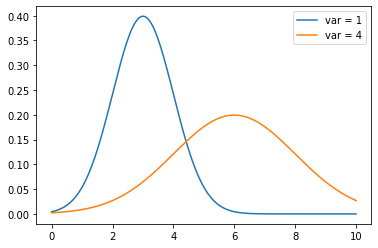

In [4]:
mu1 = 3
var1 = 1
s1 = math.sqrt(var1)

mu2 = 6
var2 = 4
s2 = math.sqrt(var2)

x = np.linspace(0, 10, 200)
plt.plot(x, stats.norm.pdf(x, mu1, s1), label="var = 1")
plt.plot(x, stats.norm.pdf(x, mu2, s2), label="var = 4")
_ = plt.legend()